In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## PCA 실습

#### PCA 단계

1. 입력 데이터의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 k개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 고유벡터를 이용해 새롭게 입력데이터를 변환

※ PCA는 많은 속성으로 구성된 원본데이터를 그 핵심을 구성하는 데이터로 압축

### 예제1. iris dataset

- Features : sepal length, sepal width, petal length, petal width

- 차원 축소 목표
    - 4개의 속성을 2개의 PCA 차원으로 압축
    - 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=col_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

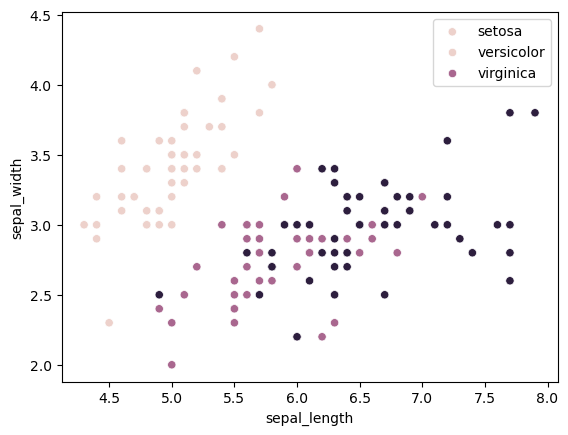

In [15]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='target')
plt.legend(iris.target_names)
plt.show()

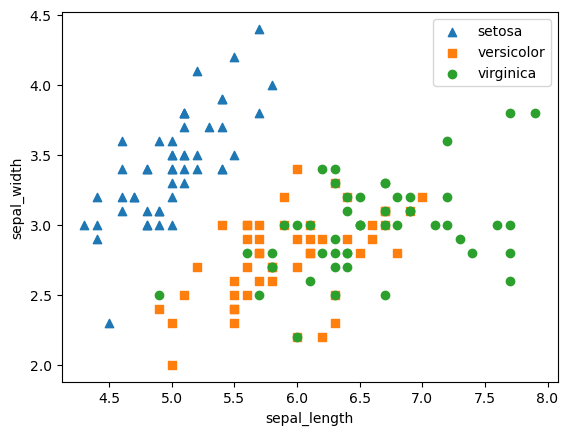

In [17]:
markers = ['^','s','o']
for i,m in enumerate(markers):
    x = iris_df[iris_df['target'] == i].sepal_length
    y = iris_df[iris_df['target'] == i].sepal_width
    plt.scatter(x,y,label=iris.target_names[i], marker=m)
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

#### 4개 변수에 대한 산점도행렬

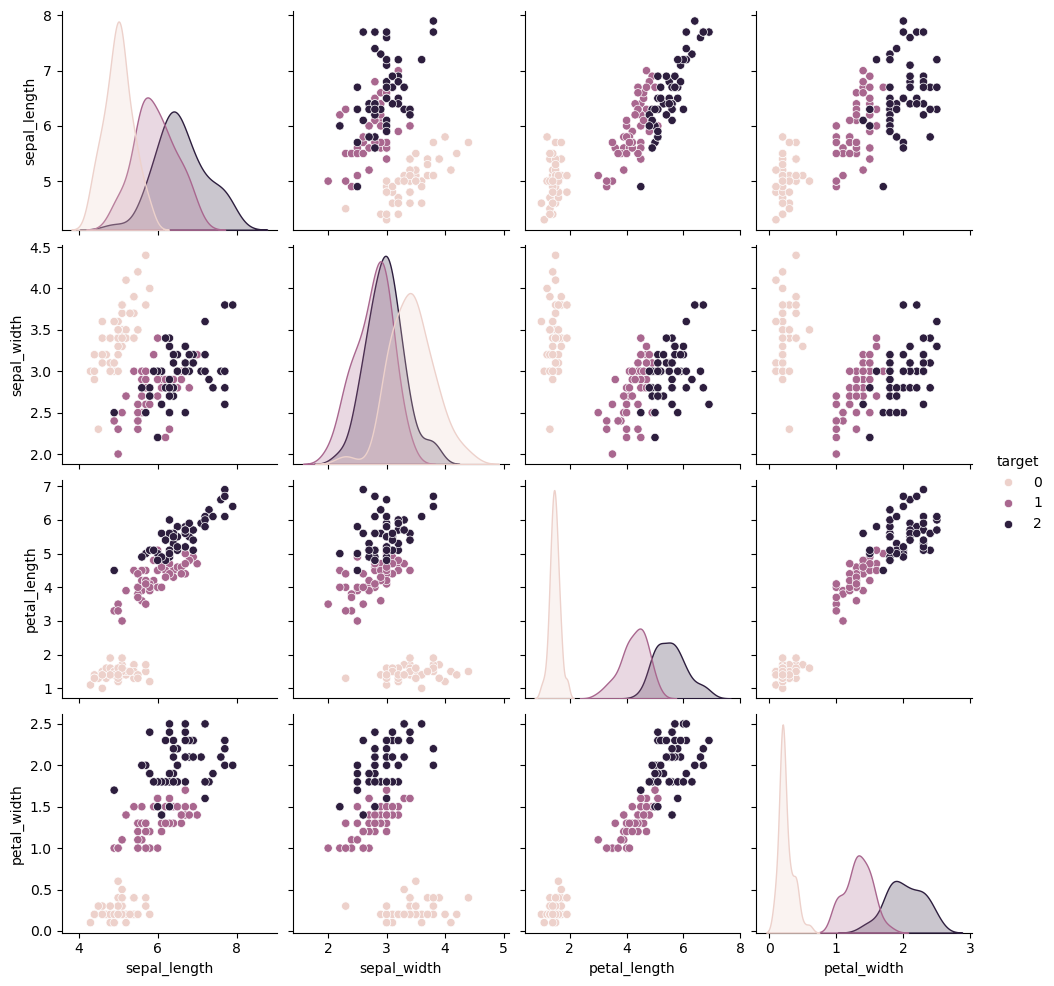

In [19]:
sns.pairplot(data= iris_df, hue='target')
plt.show()

### PCA로 4개 속성을 2개로 압축하여 분포 시각화

- PCA는 여러 속성의 값을 연산해야하므로 속성의 스케일에 영향을 받음
- PCA를 적용하기 전에 속성에 대한 스케일링 작업이 필요
    - Standard Scaling

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [20]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [21]:
iris_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

#### PCA 변환

- PCA 클래스 임포트

In [22]:
from sklearn.decomposition import PCA

- PCA 객체 생성하여 차원축소

In [23]:
pca = PCA()
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 4)

- pca 변환된 행렬을 데이터프레임으로 변환

In [25]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['comp1','comp2','comp3','comp4'])
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,comp1,comp2,comp3,comp4,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

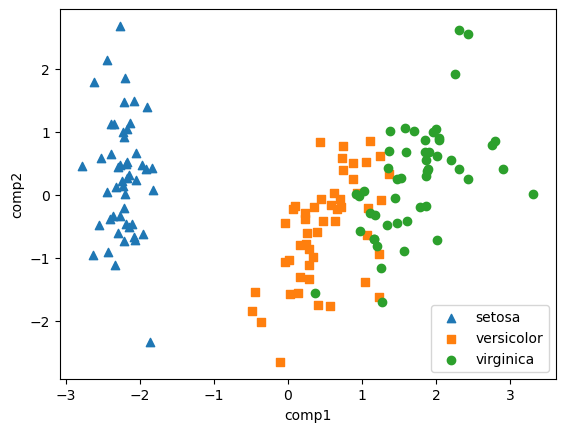

In [27]:
markers = ['^','s','o']
for i,m in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i].comp1
    y = iris_pca_df[iris_pca_df['target'] == i].comp2
    plt.scatter(x,y,label=iris.target_names[i], marker=m)
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

- comp1축을 기반으로 setosa 품종은 명확하게 구분됨
- versicolor와 virginica는 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분됨
- comp1 축이 원본 데이터의 변동성을 잘 반영했기 때문

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ratio_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [28]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

=> 첫 번째 PCA 변환 요소인 comp1은 전체 변동성의 약 73%를 차지, comp2는 22.9% 차지

### 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

- Estimator :  RansdomForestClassifier  
- cross_val_score() 이용 3개의 교차 검증 세트로 정확도 결과 비교

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#### 원본데이터 기반의 랜덤포레스트 분류 성능

In [33]:
x = iris.data
y = iris.target
rf = RandomForestClassifier(random_state=156)
acc = cross_val_score(rf, x,y, scoring='accuracy', cv=3)
np.mean(acc)

0.96

#### PCA로 변환된 데이터 기반의 랜덤포레스트 분류 성능

In [37]:
# 4개(전체)의 속성
x_pca = iris_pca_df.drop('target', axis=1)
y_pca = iris_pca_df.target
rf_pca = RandomForestClassifier(random_state=156)
acc_pca = cross_val_score(rf_pca, x_pca,y_pca, scoring='accuracy', cv=3)
np.mean(acc_pca)

0.94

In [38]:
# 2개의 속성
x_pca2 = iris_pca[:,:2]
y_pca = iris_pca_df.target
rf_pca2 = RandomForestClassifier(random_state=156)
acc_pca2 = cross_val_score(rf_pca2, x_pca2,y_pca, scoring='accuracy', cv=3)
np.mean(acc_pca2)

0.88

- 4개의 속성이 2개의 변환 속성 감소하면서 예측 성능의 정확도가 원본데이터에 비해 8%정도 하락
- 4개의 속성이 2개의 속성으로 속성 개수가 50%감소한 것을 고려하면 PCA 변환 후의 특징을 상당부분을 유지하고 있음을 나타냄

---------------------------------